In [1]:

import datetime as dt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv("Data/ThrowbackDataThursday Week 11 - Film Genre Stats.csv")

In [3]:
data.columns = ['index','genre','year','movies_released','gross','tickets_sold','ia_gross','top_movie','top_movie_gross','tm_ia_gross']

In [4]:
data.head()

,index,genre,year,movies_released,gross,tickets_sold,ia_gross,top_movie,top_movie_gross,tm_ia_gross
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [5]:
data.isnull().sum()

index              0
genre              0
year               0
movies_released    0
gross              0
tickets_sold       0
ia_gross           0
top_movie          0
top_movie_gross    0
tm_ia_gross        0
dtype: int64

In [6]:
data['genre'].unique()

array(['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller or Suspense',
       'Horror', 'Romantic Comedy', 'Musical', 'Documentary',
       'Dark Comedy', 'Western', 'Concert or Performance',
       'Multiple Genres', 'Reality'], dtype=object)

In [7]:
data['genre'] = pd.Categorical(data.genre)

In [8]:
data.describe()

,index,year,movies_released,gross,tickets_sold,ia_gross,top_movie_gross,tm_ia_gross
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,149.500000,2006.963333,46.700000,7.382075e+08,1.078744e+08,9.676330e+08,1.350016e+08,1.766255e+08
std,86.746758,6.801189,60.938398,8.783016e+08,1.227454e+08,1.101026e+09,1.395006e+08,1.737089e+08
min,0.000000,1995.000000,1.000000,2.010000e+03,2.250000e+02,2.018000e+03,2.010000e+03,2.018000e+03
25%,74.750000,2001.000000,6.000000,5.786591e+07,8.275600e+06,7.423214e+07,2.528707e+07,3.603908e+07
50%,149.500000,2007.000000,25.000000,3.694118e+08,5.634667e+07,5.054296e+08,9.351396e+07,1.223360e+08
75%,224.250000,2013.000000,56.250000,1.294524e+09,1.859968e+08,1.668391e+09,1.886230e+08,2.841907e+08
max,299.000000,2018.000000,287.000000,4.159138e+09,4.851841e+08,4.352101e+09,7.422089e+08,8.478831e+08


Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import plotly.express as px

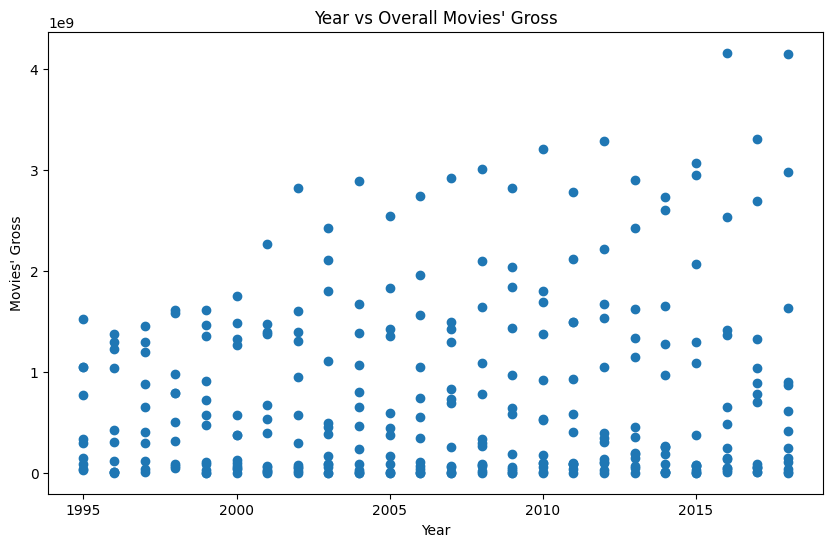

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(data['year'],data['gross'])
plt.title("Year vs Overall Movies' Gross")
plt.xlabel('Year')
plt.ylabel("Movies' Gross")
plt.show()

In [11]:
genre_data = data.groupby('genre').agg({
    'gross':['sum','mean'],'tickets_sold':['sum','mean'],'ia_gross':['sum','mean']
}).reset_index()

/var/folders/hc/bnq7ydmn3n11mhn6v2pzy64r0000gn/T/ipykernel_1569/2848399670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_data = data.groupby('genre').agg({


In [12]:
genre_data.columns = ['genre','overall_gross','avg_gross','overall_tickets_sold','avg_tickets_sold','overall_ia_gross','avg_ia_gross']

In [13]:
genre_data_sorted = genre_data.sort_values(by='overall_gross', ascending=False)
fig = px.bar(genre_data_sorted, x='genre', y='overall_gross', labels={'genre':'Genre','gross':'Overall Gross'})
fig.show()

Movies of Genre Adventure has highest overall gross values followed by Action, while Reality, Multiple Genres have the least gross values.

In [14]:
genre_data_sorted = genre_data.sort_values(by="overall_tickets_sold",ascending=False)
fig = px.bar(genre_data_sorted, x='genre',y='overall_tickets_sold')
fig.show()

The number of tickets sold influences the gross, hence the ranking is similar to that of the overall gross.

In [15]:
genre_data_sorted = genre_data.sort_values(by="overall_ia_gross",ascending=False)
px.bar(genre_data_sorted, x='genre',y='overall_ia_gross')

In [16]:
genre_data_sorted = genre_data.sort_values(by="avg_gross",ascending=False)
px.bar(genre_data_sorted, x='genre',y='avg_gross')

In [17]:
genre_data_sorted = genre_data.sort_values(by="avg_tickets_sold",ascending=False)
px.bar(genre_data_sorted, x='genre',y='avg_tickets_sold')

In [18]:
genre_data_sorted = genre_data.sort_values(by="avg_ia_gross",ascending=False)
px.bar(genre_data_sorted, x='genre',y='avg_ia_gross',labels={'avg_ia_gross':'Average Gross(Inflation Adjusted)','genre':'Genre'})

In [19]:
year_data = data.groupby('year').agg({
    'gross':['sum','mean'],'tickets_sold':['sum','mean'],'ia_gross':['sum','mean']
}).reset_index()

In [20]:
year_data.columns = ['year','overall_gross','avg_gross','overall_tickets_sold','avg_tickets_sold','overall_ia_gross','avg_ia_gross']

<Axes: xlabel='year'>

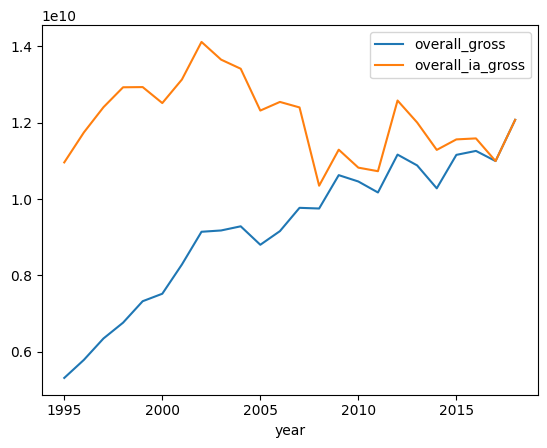

In [21]:
year_data.plot(kind='line',x='year', y=['overall_gross','overall_ia_gross'])

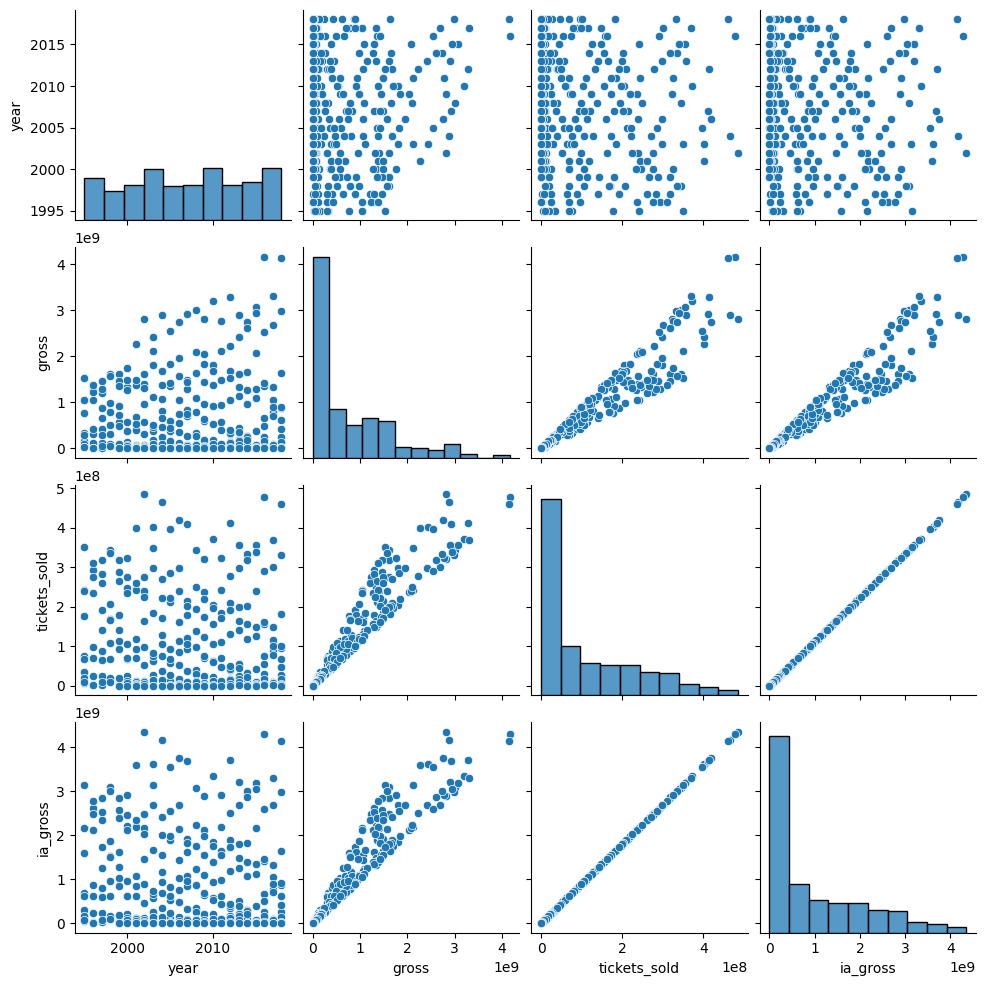

In [22]:
sns.pairplot(data[['year','gross', 'tickets_sold', 'ia_gross']])

In [23]:
year_data_sorted = year_data.sort_values(by='avg_gross', ascending=True)
px.pie(year_data_sorted,names='year',values='avg_gross')

In [24]:
year_genre_data = data.groupby(['year','genre']).agg({'movies_released':['sum','mean'],'gross':['sum','mean'],'tickets_sold':['sum','mean'],'ia_gross':['sum','mean']}).reset_index()

/var/folders/hc/bnq7ydmn3n11mhn6v2pzy64r0000gn/T/ipykernel_1569/1508230287.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [25]:
year_genre_data.head()

year                   genre movies_released             gross  \
                                            sum  mean         sum   
0  1995                  Action              29  29.0  1049544278   
1  1995               Adventure              29  29.0   771507571   
2  1995                  Comedy              61  61.0  1048895722   
3  1995  Concert or Performance               0   NaN           0   
4  1995             Dark Comedy               3   3.0    24185598   

                tickets_sold                 ia_gross                
           mean          sum         mean         sum          mean  
0  1.049544e+09    241274531  241274531.0  2164232543  2.164233e+09  
1  7.715076e+08    177358047  177358047.0  1590901682  1.590902e+09  
2  1.048896e+09    241125423  241125423.0  2162895044  2.162895e+09  
3           NaN            0          NaN           0           NaN  
4  2.418560e+07      5559905    5559905.0    49872348  4.987235e+07

In [26]:
year_genre_data.columns = year_genre_data.columns.get_level_values(1)
year_genre_data.columns = ['year','genre','overall_movies_count','avg_movies_count','overall_gross','avg_gross','overall_tickets_sold','avg_ticekts_sold','overall_ia_gross','avg_ia_gross']
year_genre_data.head()

,year,genre,overall_movies_count,avg_movies_count,overall_gross,avg_gross,overall_tickets_sold,avg_ticekts_sold,overall_ia_gross,avg_ia_gross
0,1995,Action,29,29.0,1049544278,1.049544e+09,241274531,241274531.0,2164232543,2.164233e+09
1,1995,Adventure,29,29.0,771507571,7.715076e+08,177358047,177358047.0,1590901682,1.590902e+09
2,1995,Comedy,61,61.0,1048895722,1.048896e+09,241125423,241125423.0,2162895044,2.162895e+09
3,1995,Concert or Performance,0,NaN,0,NaN,0,NaN,0,NaN
4,1995,Dark Comedy,3,3.0,24185598,2.418560e+07,5559905,5559905.0,49872348,4.987235e+07


In [27]:
px.bar(year_genre_data,x='year',y='overall_movies_count',color='genre')

/Users/sainivasrangaraju/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [28]:
px.line(year_genre_data,x='year',y='overall_gross',color='genre')

/Users/sainivasrangaraju/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [29]:
px.line(year_genre_data,x='year',y='overall_ia_gross',color='genre')

/Users/sainivasrangaraju/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [30]:
for year in year_genre_data.year.unique():
    data_for_year = year_genre_data[year_genre_data['year'] == year]
    
    fig = px.pie(
        data_for_year,
        names='genre',
        values='overall_ia_gross',
        title=f'Pie Chart for {year}',
        labels={'overall_gross': 'Overall Gross'}
    )
    
    fig.update_traces(textinfo = 'label+percent', textposition = 'inside')
    
    fig.show()

From above, the genres Action and Adventure have almost 50% of the overall gross, with adjusted inflation rates, over all the years, indicating that people like Action and Adventure movies a lot over Reality and Documentary movies.

In [31]:
data.head()

,index,genre,year,movies_released,gross,tickets_sold,ia_gross,top_movie,top_movie_gross,tm_ia_gross
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [32]:
len(data.top_movie.unique())

287

In [33]:
cor_matrix = data[['year','movies_released','gross','tickets_sold','ia_gross','top_movie_gross','tm_ia_gross']].corr()
cor_matrix

,year,movies_released,gross,tickets_sold,ia_gross,top_movie_gross,tm_ia_gross
year,1.000000,0.157161,0.105170,-0.089789,-0.089789,0.135810,-0.092884
movies_released,0.157161,1.000000,0.412978,0.401281,0.401281,0.235386,0.210184
gross,0.105170,0.412978,1.000000,0.955279,0.955279,0.857945,0.809520
tickets_sold,-0.089789,0.401281,0.955279,1.000000,1.000000,0.802512,0.843960
ia_gross,-0.089789,0.401281,0.955279,1.000000,1.000000,0.802512,0.843960
top_movie_gross,0.135810,0.235386,0.857945,0.802512,0.802512,1.000000,0.945117
tm_ia_gross,-0.092884,0.210184,0.809520,0.843960,0.843960,0.945117,1.000000


1. The number of tickets sold have high positive correlation with gross, inflation adjusted gross, top movie's gross and top movie's inflation adjusted graph. This is expected as the higher the number of tickets, greater is the amount collected.

2. Gross, inflation adjusted gross, top movie's gross and top movie's inflation adjusted gross have high correlation and it is understandable, as usually the inflation rate does not change much, until in rare cases of wars or other disasters that have drastic effects on the economy.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(123)
features = ['tickets_sold', 'top_movie_gross']
target = ['gross']
X,y = data[features],data[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Intercept:',lm.intercept_)
print('Coefficients:',lm.coef_)
pred = lm.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test,pred))
print('RMSE:',rmse)
print('R-squared',r2_score(y_test,pred))

Intercept: [-57670548.65570688]
Coefficients: [[5.43613636 1.60839355]]
RMSE: 196409730.47679722
R-squared 0.945614779012812


In [35]:
from sklearn.ensemble import RandomForestRegressor as RFR
rf_model = RFR(n_estimators=1000)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:',rmse)
print('R-squared',r2_score(y_test,y_pred))

/Users/sainivasrangaraju/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RMSE: 205017244.97121066
R-squared 0.9407435425247792


Here the linear model predicts the gross of the year and genre given the tickets sold for that genre and the top movie's gross of the same genre and the year almost accurately. The R-squared value of 0.95 indicates that the model has captured the relation between the predictors and response. As seen in the pair-wise plot above, there is linear relation between gross, tickets sold and the linear model is the best option in this case.